In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
# Import the data
df = pd.read_csv("data.csv")

# View the shape and columns names
print(df.shape)
df.columns

(169909, 19)


Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [3]:
# Check for missing values
df.isnull().sum()


acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [4]:
# Drop unneccessary columns
df.drop(["id", "key", "mode", "explicit", "release_date"], axis=1, inplace=True)
df.head()

,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0.563,0.1510,-12.428,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0.901,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0.000,0.1190,-19.924,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0.887,0.1110,-14.734,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0.908,0.0980,-16.829,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928


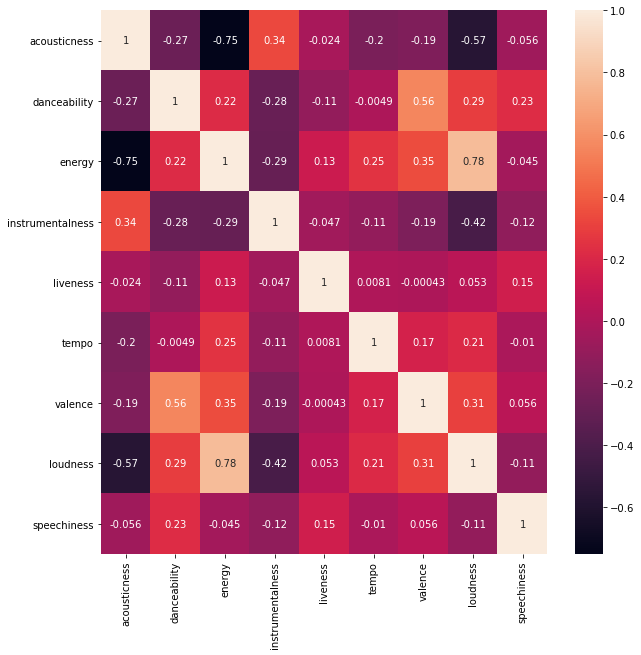

In [5]:
corr = df[["acousticness","danceability","energy", "instrumentalness", 
           "liveness","tempo", "valence", "loudness", "speechiness"]].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)


In [6]:
year_avg = df[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness", "speechiness", "year"]].\
groupby("year").mean().sort_values(by="year").reset_index()

year_avg.head()

,year,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness
0,1921,0.895823,0.425661,0.236784,0.322330,0.215814,100.397758,0.425495,-17.095438,0.077258
1,1922,0.939236,0.480000,0.237026,0.440470,0.238647,101.376139,0.534056,-19.179958,0.115419
2,1923,0.976329,0.568462,0.246936,0.401932,0.236656,112.456598,0.624788,-14.373882,0.098619
3,1924,0.935575,0.548654,0.347033,0.583955,0.237875,120.653359,0.668574,-14.202304,0.090210
4,1925,0.965422,0.571890,0.264373,0.408893,0.243094,115.671715,0.616430,-14.516707,0.115457


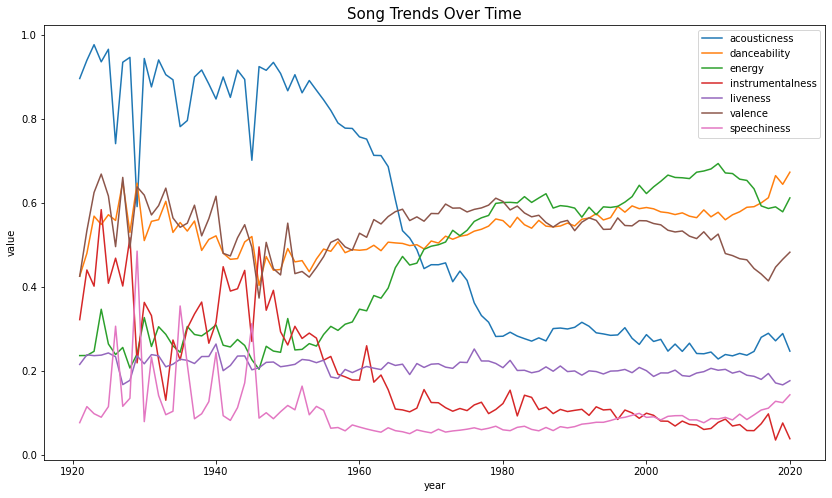

In [7]:
# Create a line plot
plt.figure(figsize=(14,8))
plt.title("Song Trends Over Time", fontdict={"fontsize": 15})

lines = ["acousticness","danceability","energy", 
         "instrumentalness", "liveness", "valence", "speechiness"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
    
    
plt.ylabel("value")
plt.legend(lines)

In [8]:
# Check for the number of unique artists
df["artists"].nunique()

33375

In [9]:
# Top 10 artists with most songs
df["artists"].value_counts()[:10]

['Эрнест Хемингуэй']      1215
['Francisco Canaro']       938
['Эрих Мария Ремарк']      781
['Ignacio Corsini']        620
['Frank Sinatra']          592
['Bob Dylan']              539
['The Rolling Stones']     512
['Johnny Cash']            502
['The Beach Boys']         491
['Elvis Presley']          488
Name: artists, dtype: int64

In [10]:
artist_list = df.artists.value_counts().index[:10]

df_artists = df[df.artists.isin(artist_list)][["artists","year"]].\
groupby(["artists","year"]).size().reset_index(name="song_count")

df_artists.head()


,artists,year,song_count
0,['Bob Dylan'],1962,13
1,['Bob Dylan'],1963,73
2,['Bob Dylan'],1964,21
3,['Bob Dylan'],1965,66
4,['Bob Dylan'],1966,72


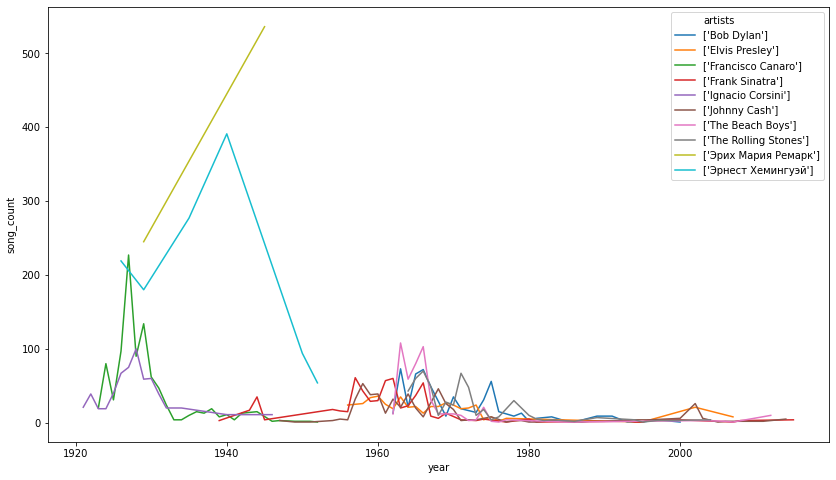

In [11]:
plt.figure(figsize=(14,8))
sns.lineplot(x="year", y="song_count", hue="artists", data=df_artists)

In [12]:
top_artists = pd.DataFrame(np.zeros((100,10)), columns=artist_list)
top_artists['year'] = np.arange(1921,2021)
print(top_artists.shape)
top_artists.head()

(100, 11)


,['Эрнест Хемингуэй'],['Francisco Canaro'],['Эрих Мария Ремарк'],['Ignacio Corsini'],['Frank Sinatra'],['Bob Dylan'],['The Rolling Stones'],['Johnny Cash'],['The Beach Boys'],['Elvis Presley'],year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1921
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1922
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1923
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1924
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1925


In [13]:
top_artists = top_artists.melt(id_vars='year',var_name='artists', value_name='song_count')
print(top_artists.shape)
top_artists.head()

(1000, 3)


,year,artists,song_count
0,1921,['Эрнест Хемингуэй'],0.0
1,1922,['Эрнест Хемингуэй'],0.0
2,1923,['Эрнест Хемингуэй'],0.0
3,1924,['Эрнест Хемингуэй'],0.0
4,1925,['Эрнест Хемингуэй'],0.0


In [14]:
df_merged = pd.merge(top_artists, df_artists, on=['year','artists'], how='outer').\
sort_values(by='year').reset_index(drop=True)
df_merged.head()


,year,artists,song_count_x,song_count_y
0,1921,['Эрнест Хемингуэй'],0.0,NaN
1,1921,['The Beach Boys'],0.0,NaN
2,1921,['Johnny Cash'],0.0,NaN
3,1921,['The Rolling Stones'],0.0,NaN
4,1921,['Bob Dylan'],0.0,NaN


In [15]:
df_merged.fillna(0, inplace=True)
df_merged.drop('song_count_x', axis=1, inplace=True)
df_merged.rename(columns={'song_count_y':'song_count'}, inplace=True)
df_merged.head()

,year,artists,song_count
0,1921,['Эрнест Хемингуэй'],0.0
1,1921,['The Beach Boys'],0.0
2,1921,['Johnny Cash'],0.0
3,1921,['The Rolling Stones'],0.0
4,1921,['Bob Dylan'],0.0


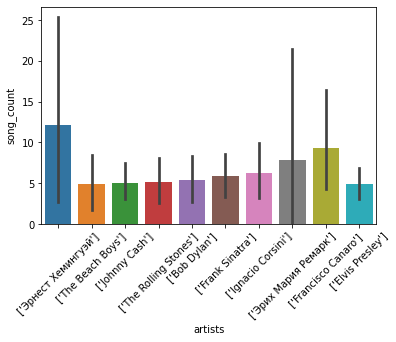

In [17]:
sns.barplot(x=df_merged['artists'],y=df_merged['song_count'])
plt.xticks(rotation=45)
plt.show()